# **Introduction:**

We have explored distribution plots for single feature. Now we will study plots to compare dists across categories.

It has four main categories:

1. Boxplot
2. Violenplot
3. Swarmplot
4. Boxenplot (letter-word plot)

# **1. Boxplot:**

* It is most common plot. It displays the distribution of continous variables. But we did the same using histogram. Why to use boxplot then?

* It does this through use of **quartiles** instead of bins.

* Quartiles separate data into 4 equal number of data points:

  1. 25% of the data in bottom/left quartile
  2. 50% of the data in middle and shows median. It is called IQR (Inter Quartile Range)
  3. 25% of the data in upper/right quartile

See the figure below to understand better:




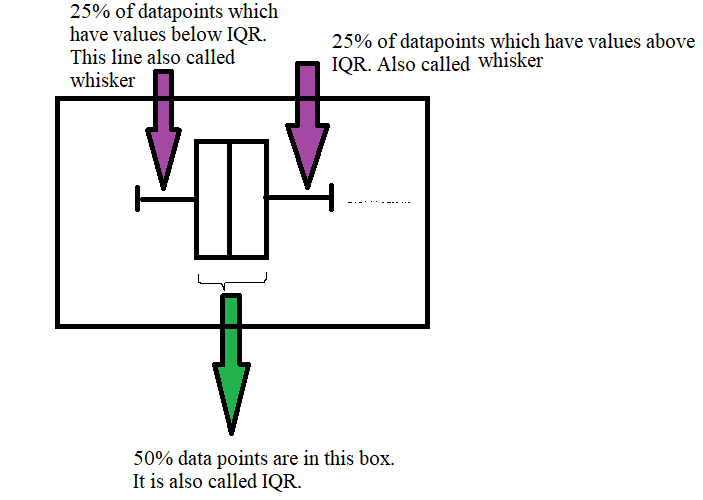



* Boxplot is also called whisker plot because it has whiskers that extend outside of the box.

* These extended lines or whiskers are defined by 1.5 x IQR. 

* Boxplot quickly gives statistical distribution information in a visual form.

* Boxplot can be oriented vertically or horizontally, upto need.

* We can make boxplot per category too. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='test preparation course', ylabel='math score'>

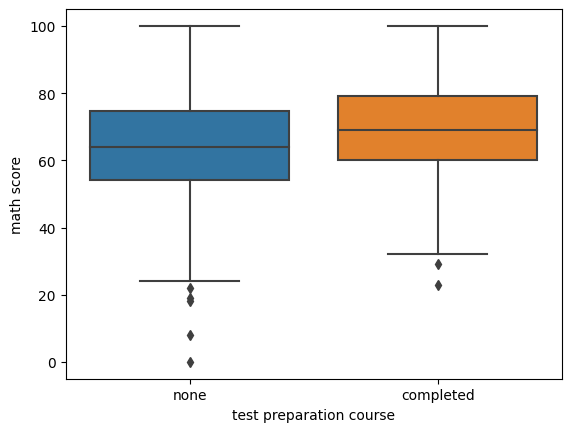

In [5]:
sns.boxplot(x = 'test preparation course', y = 'math score', data= df)

**Analysis:**

We can say the students who have completed their test preparation course achieved higher math score, which happens definitely in reality too.

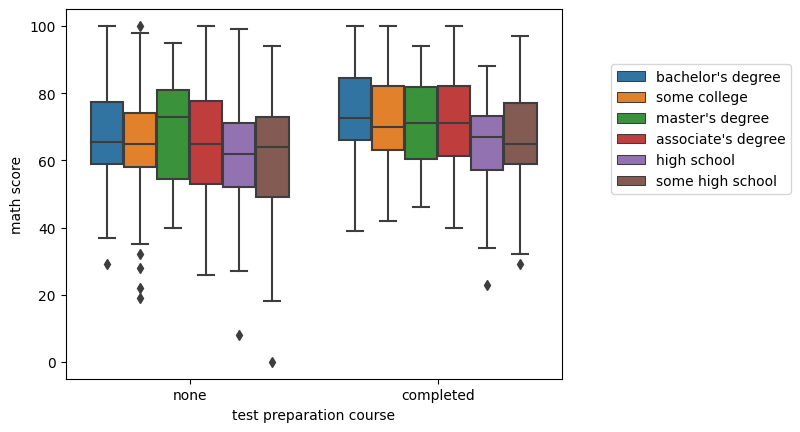

In [10]:
# adding hue

sns.boxplot(x = 'test preparation course', y = 'math score', data= df, hue = 'parental level of education')
plt.legend(loc=(1.1,0.5));

**Analysis:**

We can say the students whose parents have masters degree (blue color IQR), and who have completed test preparation course have acheived the highest marks in math. 

# **2. Violin Plot:**

1. It plays the same role as boxplot but it displays the probability density across the data **using KDE**.

2. We can imagine it as mirrored KDE plot.

3. It shows all the same information as boxplot + KDE curve.

4. We can also create violen plot per category.

<Axes: xlabel='test preparation course', ylabel='math score'>

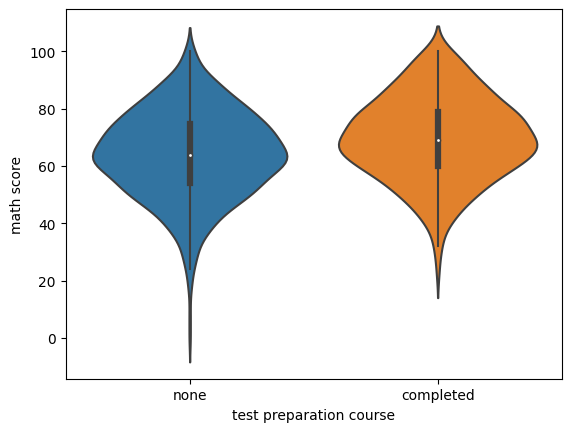

In [12]:
sns.violinplot(x = 'test preparation course', y = 'math score', data= df)

**Analysis:**

It gave the same result that if the student ha completed test preparation course then he has higher chances of achieving higher math scores.

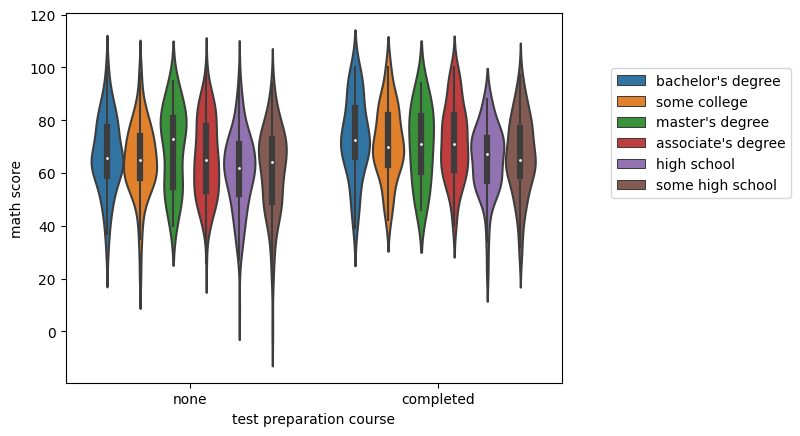

In [13]:
# adding hue

sns.violinplot(x = 'test preparation course', y = 'math score', data= df, hue = 'parental level of education')
plt.legend(loc=(1.1,0.5));

**Nota Bene:** That one white dot in mid of each violin plot shows the median. We can see the box plot inside each violin along with whiskers around it.

To remove that box plot from inside of violin plot, because we can analyze the result using the violin only too. Boxplot sometimes is extra. So to remove that, use **'inner = None'**.

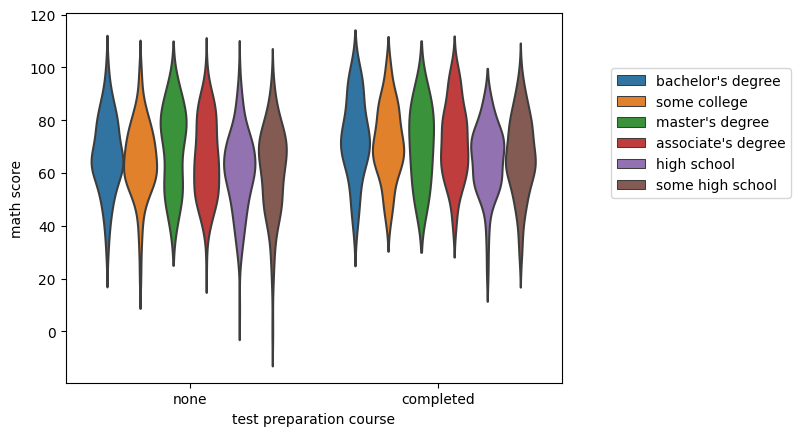

In [14]:
sns.violinplot(x = 'test preparation course', y = 'math score', data= df, hue = 'parental level of education', inner = None)
plt.legend(loc=(1.1,0.5));

If we want to divide violin plot in 4 equal parts, we can use **quartiles** inside of the violin plot.

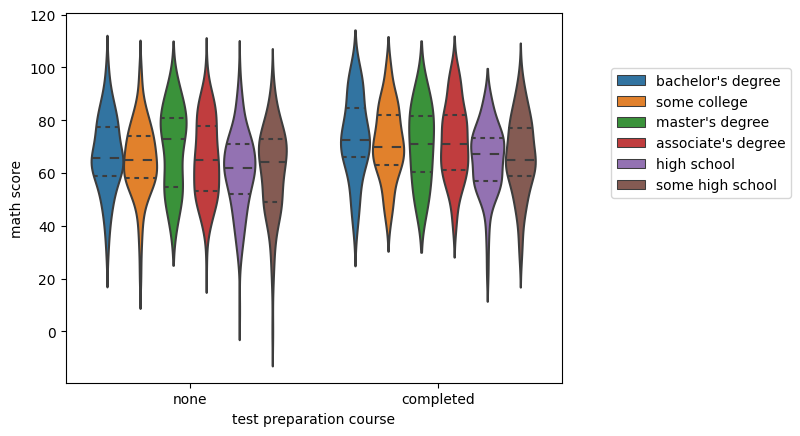

In [21]:
sns.violinplot(x = 'test preparation course', y = 'math score', data= df, hue = 'parental level of education', inner = 'quartile')
plt.legend(loc=(1.1,0.5));

To see one line for each instance/datapoint in the violin plot, use **inner = 'sticks'**.

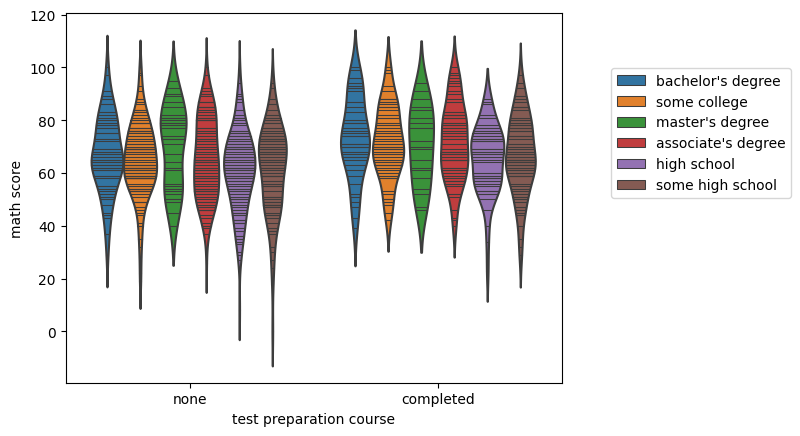

In [22]:
sns.violinplot(x = 'test preparation course', y = 'math score', data= df, hue = 'parental level of education', inner = 'sticks')
plt.legend(loc=(1.1,0.5));

If we have two levels in hue, (that are none and completed e.g.) then we can merge them into one using **split = True**. But keep in mind that if we use hue which has more than one levels e.g. as we used above hue as parental level of education which was having 6 levels, we can't merge them. Merge only when you have only 2 levels. Thats why we changed below the x feature as hue to show you the actual purpose of split parameter.

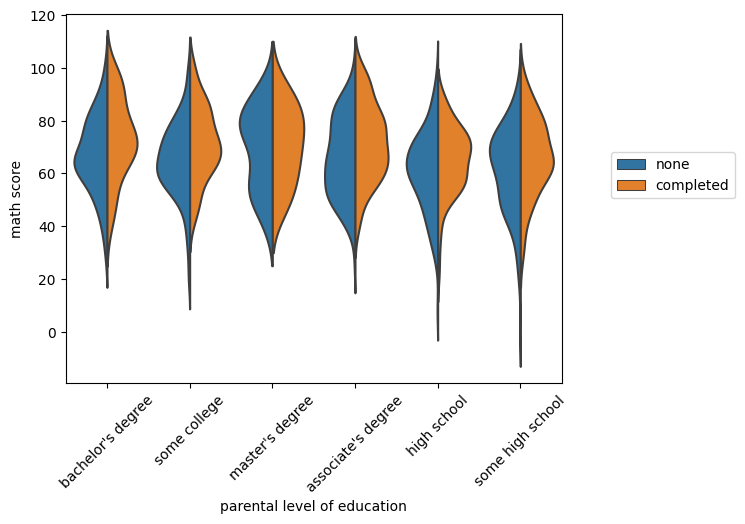

In [17]:
sns.violinplot(hue = 'test preparation course', y = 'math score', data= df, x = 'parental level of education', split = True, inner = None)
plt.legend(loc=(1.1,0.5))
plt.xticks(rotation=45);


As it has KDE, so we can set its bandwidth.

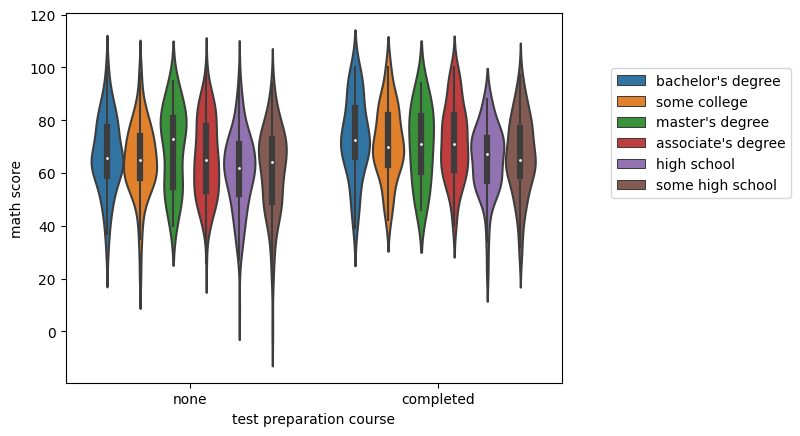

In [26]:
sns.violinplot(x = 'test preparation course', y = 'math score', data= df, hue = 'parental level of education', bw_width = 0.01)
plt.legend(loc=(1.1,0.5));

# **3. Swarmplot:**

1. It is very less commonly used plot type.

2. It is simple and simply shows all the points in the distribution.

3. For large datasets, it will not show all the data points and will display general distribution of them. Then, seaborn will give warning that you are missing data points. To handle this situation, make the size of datapoints smaller.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


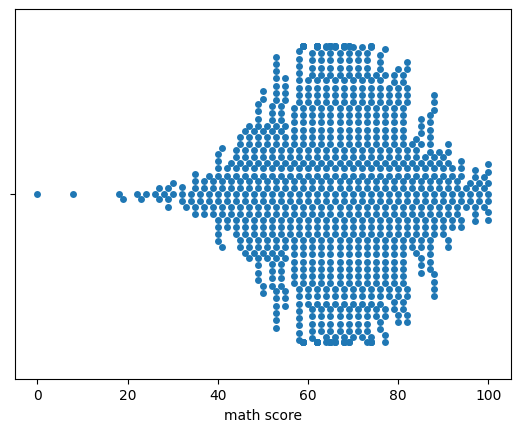

In [28]:
sns.swarmplot(x= 'math score', data = df);

Let's change the point size to show more points to avoid warning.

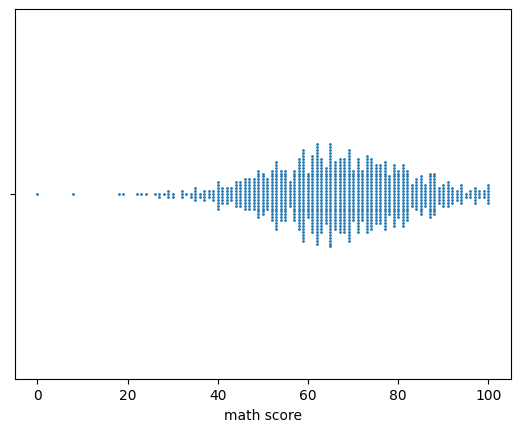

In [30]:
sns.swarmplot(x = 'math score', data = df, size =2);

Now the warning is gone.

We can also create swarmplot per category.

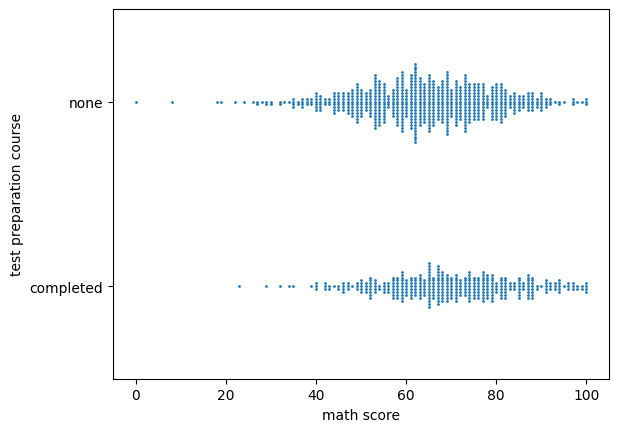

In [32]:
sns.swarmplot(x = 'math score', y ='test preparation course', data = df, size = 2);

We can also add dodge parameter. The purpose of **dodge=True** is to spread out the points within each category to minimize overlapping. 

This can be particularly useful when dealing with crowded plots, as it allows for better visibility and distinction between the individual data points. 

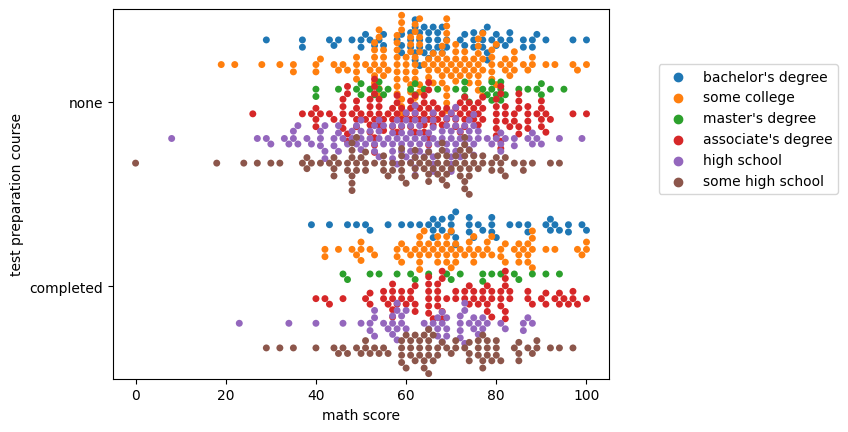

In [36]:
# Add hue

sns.swarmplot(x = 'math score', y ='test preparation course', data = df, dodge = True, hue = 'parental level of education')
plt.legend(loc = (1.1, 0.5));

# **4. Boxenplot:**

* It is developed as expansion upon the normal boxplot.

* It is currently very uncommon.

* It uses a system of letter-values to use multiple quantiles instead of strictly quartiles (4 portions).

* Quartile divide data in 4 equal parts. Quantile involve percentile (100 parts), decile(10 parts) etc.

* Using quantile depends on the number of points you have in your data.

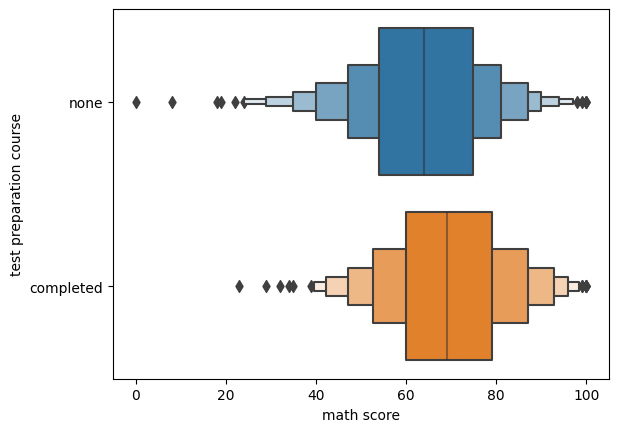

In [38]:
sns.boxenplot(x = 'math score', y ='test preparation course', data = df);